# NYC Collision Analysis

In [83]:
%pip install seaborn
%pip install matplotlib 
%pip install pandas
%pip install folium 
%pip install plotly


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is 

In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean default style
sns.set_theme(style='whitegrid')

# Ensure img folder exists
os.makedirs("img", exist_ok=True)

#Color Palette
collision_color = "#4C72B0"
injury_color = "#55A868"
fatal_color = "#C44E52"
highlight_color = "#FFA15A"



## Collisons by Area

In [98]:

df_map = pd.read_csv("Motor_Vehicle_Collisions.csv", low_memory=False)

df_map = df_map[df_map['LATITUDE'].notnull() & df_map['LONGITUDE'].notnull()]

# Initialize base map centered on NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
heat_data = df_map[['LATITUDE', 'LONGITUDE']].values.tolist()
HeatMap(heat_data[:10000], radius=8).add_to(m)


m.save("img/3a_collision_map_folium.html")

#Intensity level -> blue -> green -> yellow
display(m)

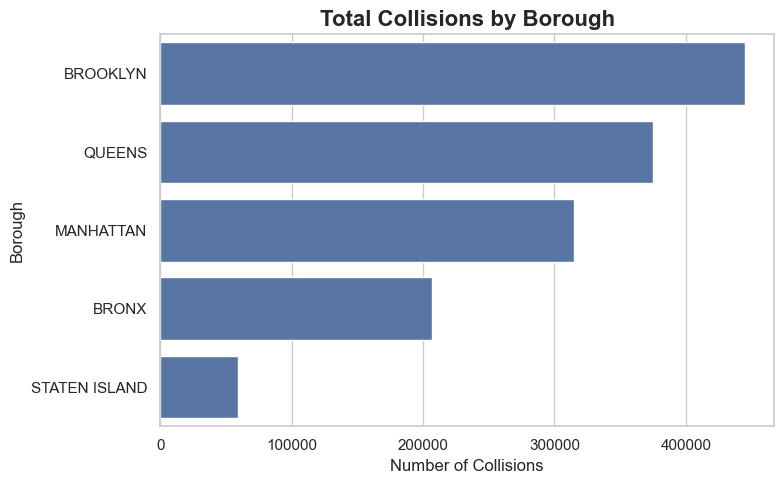

In [86]:
df_borough = pd.read_csv("data/3a_collisions_by_borough.csv")

plt.figure(figsize=(8, 5))
sns.barplot(data=df_borough, x='total_collisions', y='borough', color=collision_color)
plt.title("Total Collisions by Borough", fontsize=16, weight='bold')
plt.xlabel("Number of Collisions")
plt.ylabel("Borough")
plt.tight_layout()
plt.savefig("img/3a_borough_collisions_barplot.png")
plt.show()


## Casualties by Victim Type per Borough

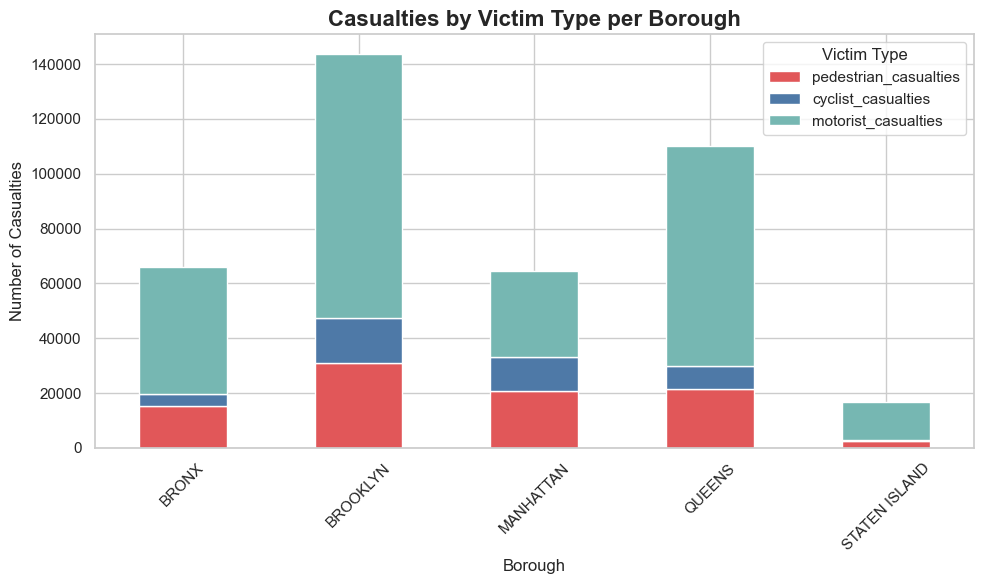

In [87]:
df = pd.read_csv("data/3a_borough_victim_type_casualties.csv")

# Set borough as index (optional)
df = df.set_index('borough')

# Plot
df.plot(kind='bar', stacked=True, figsize=(10, 6), color=["#E15759", "#4E79A7", "#76B7B2"])
plt.title("Casualties by Victim Type per Borough", fontsize=16, weight='bold')
plt.ylabel("Number of Casualties")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.legend(title="Victim Type")
plt.tight_layout()
plt.savefig("img/3a_borough_victim_type_stackedbar.png")
plt.show()


- **Brooklyn** accounts for the highest number of total casualties across all types.
- **Manhattan** has a relatively larger share of **pedestrian and cyclist casualties**, indicating a greater presence of vulnerable road users.
- **Staten Island**, while lowest overall, still shows over 13,000 motorist casualties.


## Top Vehicle Types

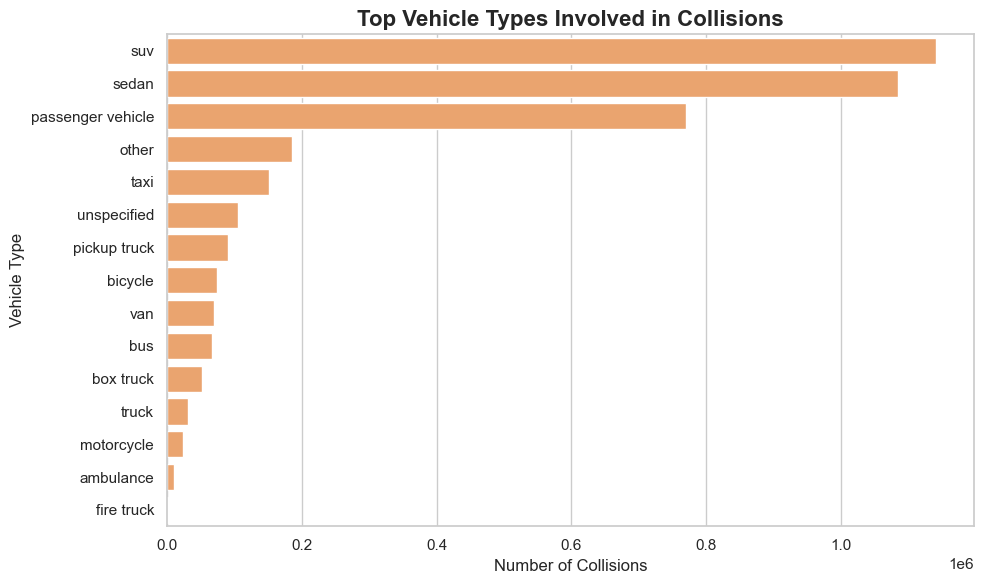

In [88]:
df_vehicle = pd.read_csv("data/3b_top_vehicle_types.csv")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_vehicle, x='total_collisions', y='cleaned_vehicle_type', color=highlight_color)
plt.title("Top Vehicle Types Involved in Collisions", fontsize=16, weight='bold')
plt.xlabel("Number of Collisions")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.savefig("img/3b_vehicle_type_collisions_barplot.png")
plt.show()



- **SUVs and sedans** are involved in the highest number of collisions, indicating their dominance on NYC roads.
- The **"passenger vehicle"** category also ranks high, though its overlap with sedans and SUVs.
- **Emergency and specialized vehicles** like ambulances and fire trucks contribute to a negligible share of incidents.


## Top Causes of Collisions

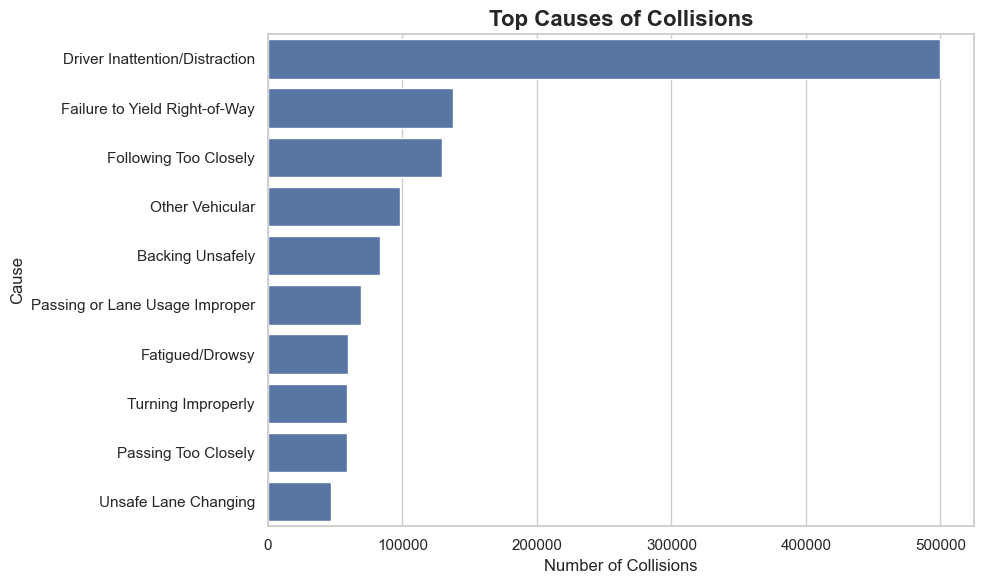

In [89]:
df_causes = pd.read_csv("data/3c_ii_collision_causes.csv")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_causes, x='total_collisions', y='cause', color=collision_color)
plt.title("Top Causes of Collisions", fontsize=16, weight='bold')
plt.xlabel("Number of Collisions")
plt.ylabel("Cause")
plt.tight_layout()
plt.savefig("img/3c_ii_causes_of_collisions_barplot.png")
plt.show()



- **Driver inattention/distraction** is by far the most common cause, responsible for nearly half a million incidents.
- **Failure to yield right-of-way** and **following too closely** also significantly contribute to collisions, suggesting issues with rule compliance and driver patience.
- Lower-ranked causes like **unsafe lane changing** and **fatigue** still represent tens of thousands of preventable crashes.

## Casualities by victim type

In [90]:
df_victim = pd.read_csv("data/3d_casualty_by_victim_type.csv")

df_injured = df_victim[df_victim['outcome'] == 'injured']
df_killed = df_victim[df_victim['outcome'] == 'killed']

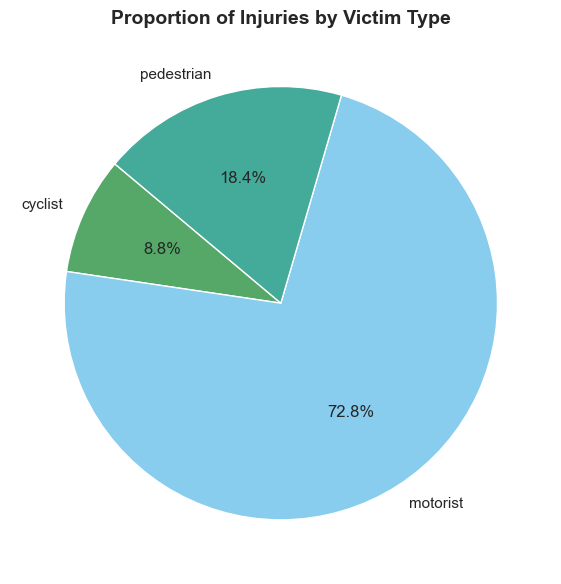

In [91]:
# Injuries Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df_injured['total'], labels=df_injured['victim_type'], autopct='%1.1f%%', startangle=140, colors=[injury_color, "#88CCEE", "#44AA99"])
plt.title("Proportion of Injuries by Victim Type", fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig("img/3d_victim_type_injured_piechart.png")
plt.show()



- **Motorists** account for the majority of injuries (72.8%), which is expected due to their higher exposure on roads.
- **Pedestrians** make up 18.4% of injuries, indicating substantial vulnerability despite lower road presence.
- **Cyclists**, though only 8.8%, still represent a critical safety concern considering their minimal physical protection.

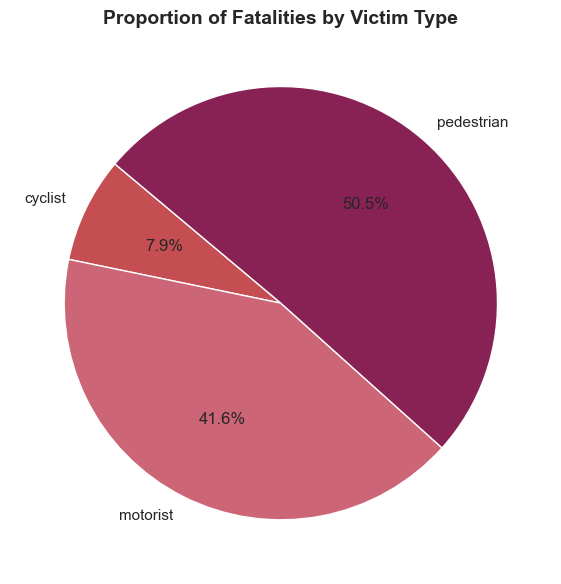

In [92]:
# Fatalities Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df_killed['total'], labels=df_killed['victim_type'], autopct='%1.1f%%', startangle=140, colors=[fatal_color, "#CC6677", "#882255"])
plt.title("Proportion of Fatalities by Victim Type", fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig("img/3d_victim_type_killed_piechart.png")
plt.show()


- **Pedestrians** suffer over **half of all fatalities (50.5%)**, highlighting how deadly collisions are for this group.
- **Motorists**, while most injured, make up a lower proportion (41.6%) of fatalities.
- **Cyclist fatalities** (7.9%) remain consistent with their injury share but still emphasize the dangers they face.

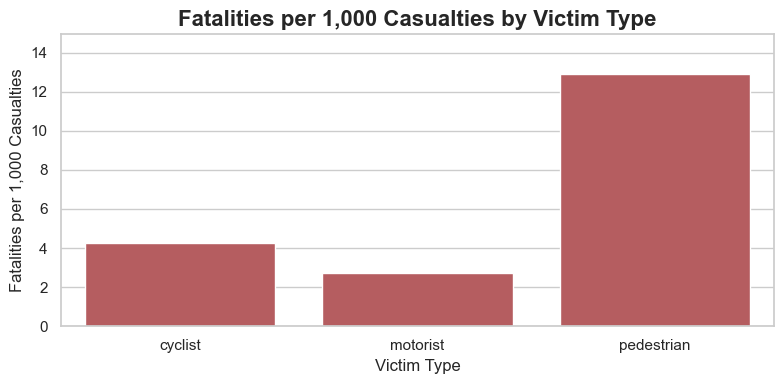

In [93]:

df_victim_wide = df_victim.pivot(index='victim_type', columns='outcome', values='total').reset_index()

df_victim_wide['fatality_rate_per_1000'] = (
    df_victim_wide['killed'] / (df_victim_wide['injured'] + df_victim_wide['killed']) * 1000
)


plt.figure(figsize=(8, 4))
sns.barplot(data=df_victim_wide, x='victim_type', y='fatality_rate_per_1000', color=fatal_color)
plt.title("Fatalities per 1,000 Casualties by Victim Type", fontsize=16, weight='bold')
plt.ylabel("Fatalities per 1,000 Casualties")
plt.xlabel("Victim Type")
plt.ylim(0, df_victim_wide['fatality_rate_per_1000'].max() + 2)
plt.tight_layout()
plt.savefig("img/3d_victim_type_fatality_rate_per1000_barplot.png")
plt.show()




- **Pedestrians** face the highest fatality risk, with over **13 deaths per 1,000 casualties**, highlighting their extreme vulnerability in collisions.
- **Cyclists** also show a higher fatality rate (~4 per 1,000) compared to motorists, despite lower overall numbers.
- **Motorists**, while most frequently injured, have the lowest fatality rate (~2.6 per 1,000), likely due to vehicle protection and infrastructure.



## Total Casualties by Year

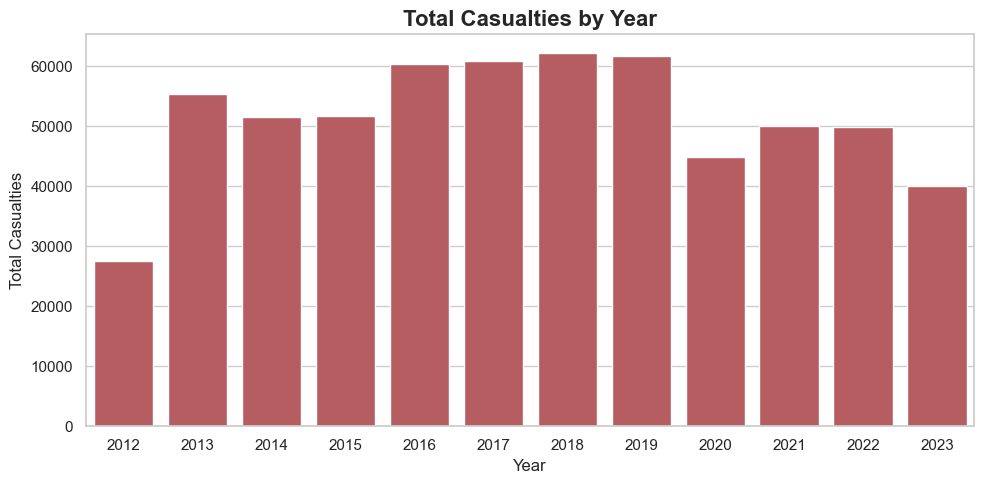

In [94]:

df_year = pd.read_csv("data/3d_casualties_by_year.csv")

plt.figure(figsize=(10, 5))
sns.barplot(data=df_year, x='year', y='total_casualties', color=fatal_color)
plt.title("Total Casualties by Year", fontsize=16, weight='bold')
plt.xlabel("Year")
plt.ylabel("Total Casualties")
plt.tight_layout()
plt.savefig("img/3d_casualties_by_year_barplot.png")
plt.show()




- **Casualties peaked** between **2016–2019**, consistently surpassing 60,000 incidents annually.
- A sharp **decline begins in 2020**, likely due to COVID-19 lockdowns and reduced road traffic.
- While there is some recovery post-2020, the lower numbers in **2023** reflects **partial-year data collection** rather than an actual drop.


## Casualty Rate

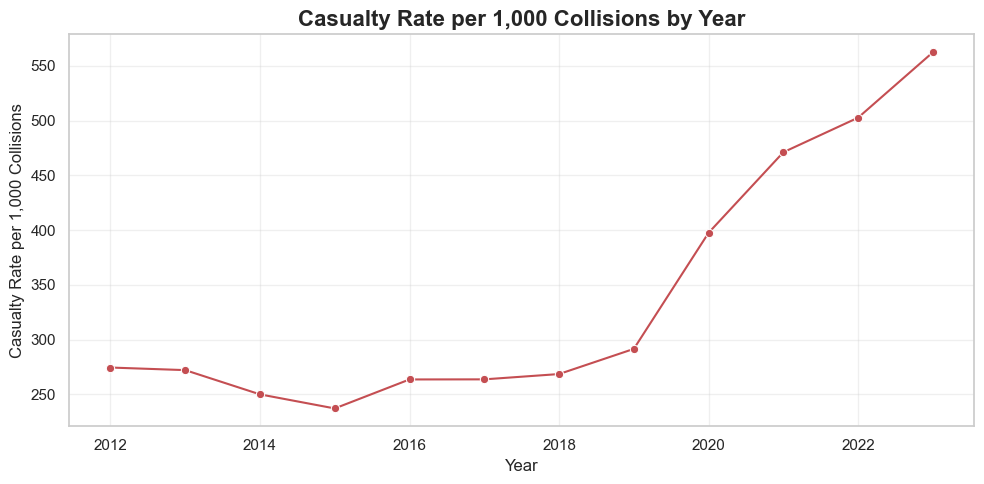

In [95]:

df = pd.read_csv("data/3d_casualty_rate_per_1000_by_year.csv")

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='year', y='casualty_rate_per_1000', marker='o', color='#C44E52')
plt.title("Casualty Rate per 1,000 Collisions by Year", fontsize=16, weight='bold')
plt.xlabel("Year")
plt.ylabel("Casualty Rate per 1,000 Collisions")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("img/3d_casualty_rate_per_1000_by_year.png")
plt.show()



- Although **total collisions dropped significantly** after 2019 (especially post-COVID), the **casualty rate per 1,000 collisions** has increased steadily.
- In **2023**, the casualty rate peaked at over **530 casualties per 1,000 collisions**, nearly **double** the rate seen in the 2012–2019 period.
- This suggests that while there are **fewer crashes overall**, the ones that do happen are **more severe**, possibly due to speeding on emptier roads, reduced enforcement, or other behavioral changes.

**A falling collision count does not necessarily equate to improved road safety.**


## EXTRAS

## Collisions by Day of the Week

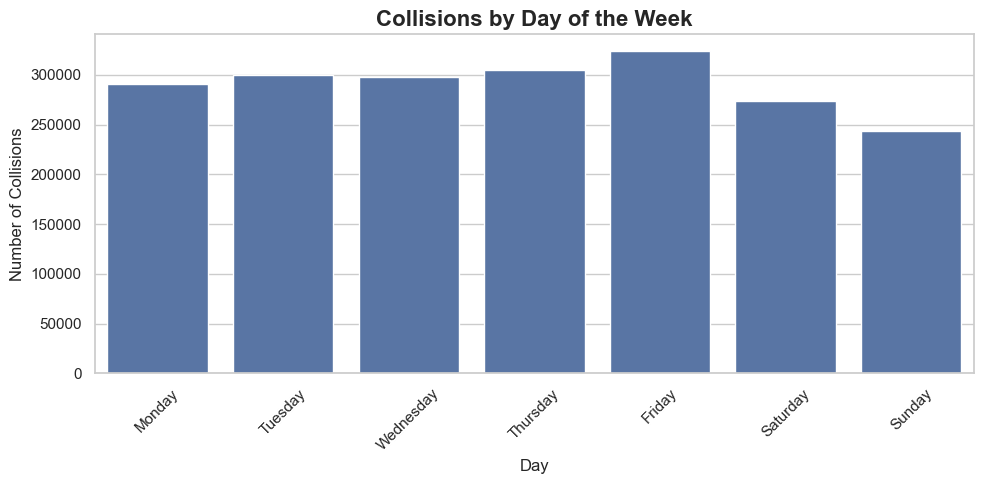

In [96]:
df_day = pd.read_csv("data/3e_collisions_by_day_of_week.csv")

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day['day_of_week'] = pd.Categorical(df_day['day_of_week'].str.strip(), categories=day_order, ordered=True)
df_day = df_day.sort_values('day_of_week')

plt.figure(figsize=(10, 5))
sns.barplot(data=df_day, x='day_of_week', y='total_collisions', color=collision_color)
plt.title("Collisions by Day of the Week", fontsize=16, weight='bold')
plt.xlabel("Day")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("img/3e_collisions_by_day_of_week.png")
plt.show()

- **Friday** records the highest number of collisions, likely due to increased traffic from commuters and early weekend travelers.
- **Tuesday through Thursday** show relatively consistent and high volumes, reflecting standard weekday traffic.
- **Saturday and Sunday** have noticeably fewer collisions, with **Sunday** having the lowest — aligning with reduced commuting and work-related traffic.


## Collisions by Hour

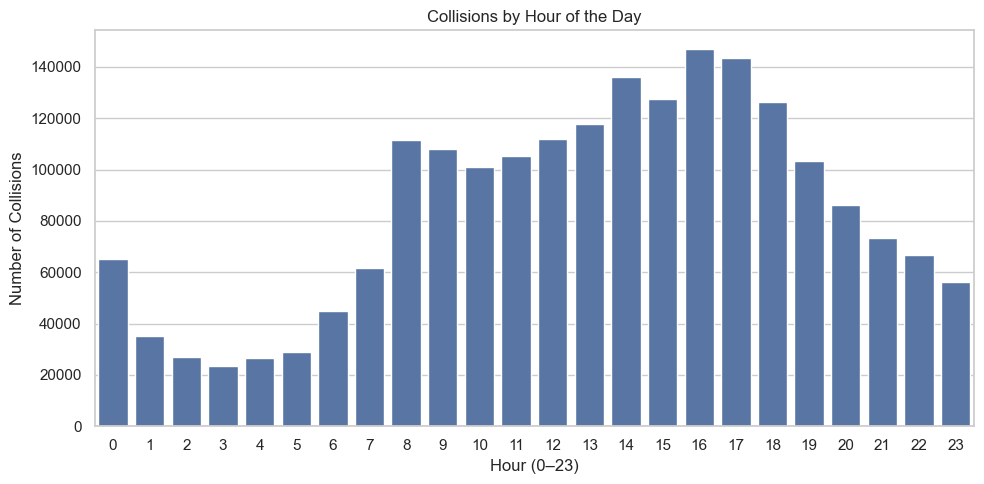

In [97]:
# Load the data
df_hour = pd.read_csv("data/3e_collisions_by_hour_of_day.csv")

# Sort by hour just in case
df_hour = df_hour.sort_values("crash_hour")

# Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_hour, x="crash_hour", y="total_collisions", color=collision_color)
plt.title("Collisions by Hour of the Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Collisions")
plt.tight_layout()
plt.savefig("img/3e_collisions_by_hour_of_day.png")
plt.show()

- Collisions start increasing sharply from **7 AM**, peaking between **3 PM and 5 PM**, which aligns with typical **afternoon rush hours**.
- A smaller spike is also observed around **8 AM**, during the **morning commute**.
- Collision volume decreases significantly after **8 PM**, with the **lowest activity during early morning hours (2–5 AM)**.